In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
gb_cb_cv = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1))

In [7]:
gb_cb = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb)

In [8]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [9]:
cat = evaluate_model(cb, X, y)

In [10]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [11]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [12]:
g = evaluate_model(gb, X, y)

In [13]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [14]:
g

,gb_score
0,0.916466
1,0.832746
2,0.913140
3,0.900737
4,0.931130
5,0.911643
6,0.924417
7,0.907012
8,0.926922
9,0.838528


In [15]:
GB_CB_CV = evaluate_model(gb_cb_cv, X, y)

In [16]:
GB_CB_CV = GB_CB_CV[['test_score']].rename(columns={'test_score':'GB_CB_CV'})

In [17]:
GB_CB_CV

,GB_CB_CV
0,0.911200
1,0.888081
2,0.914803
3,0.899077
4,0.923954
5,0.912922
6,0.916369
7,0.900379
8,0.917949
9,0.849919


In [18]:
GB_CB = evaluate_model(gb_cb, X, y)

In [19]:
GB_CB = GB_CB[['test_score']].rename(columns={'test_score':'GB_CB'})

In [20]:
GB_CB

,GB_CB
0,0.914791
1,0.883472
2,0.911611
3,0.898478
4,0.919171
5,0.907082
6,0.919957
7,0.891948
8,0.922060
9,0.864264


In [21]:
combo = pd.concat([cat, g, GB_CB_CV, GB_CB], axis=1)

In [22]:
combo

,cat_score,gb_score,GB_CB_CV,GB_CB
0,0.926950,0.916466,0.911200,0.914791
1,0.898789,0.832746,0.888081,0.883472
2,0.936517,0.913140,0.914803,0.911611
3,0.929022,0.900737,0.899077,0.898478
4,0.950638,0.931130,0.923954,0.919171
5,0.936688,0.911643,0.912922,0.907082
6,0.942846,0.924417,0.916369,0.919957
7,0.926769,0.907012,0.900379,0.891948
8,0.945508,0.926922,0.917949,0.922060
9,0.884738,0.838528,0.849919,0.864264


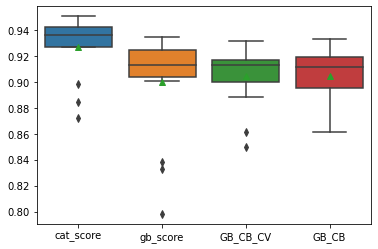

In [23]:
sns.boxplot(data=combo, showmeans=True);

In [24]:
combo.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB
count,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.904720,0.904457
std,0.023191,0.041473,0.022774,0.021228
min,0.872051,0.798137,0.849919,0.861333
25%,0.926860,0.903875,0.899728,0.895213
50%,0.936517,0.913265,0.912922,0.911611
75%,0.942064,0.924419,0.917159,0.919564
max,0.950638,0.934496,0.931763,0.932942


In [25]:
ordinald1 = pd.read_csv('OrdinalDrop1.csv')
ordinald1.shape

(2579, 83)

In [26]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [27]:
X1 = ordinald1.drop(['SalePrice'], axis=1)
y1 = ordinald1.SalePrice

In [28]:
catd1 = evaluate_model(cb, X1, y1)

In [29]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [30]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [31]:
gd1 = evaluate_model(gb, X1, y1)

In [32]:
gd1 = gd1[['test_score']].rename(columns={'test_score':'gbd1_score'})

In [33]:
gd1

,gbd1_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [34]:
GB_CB_CV_d1 = evaluate_model(gb_cb_cv, X1, y1)

In [35]:
GB_CB_CV_d1 = GB_CB_CV_d1[['test_score']].rename(columns={'test_score':'GB_CB_CV_d1'})

In [36]:
GB_CB_CV_d1

,GB_CB_CV_d1
0,0.898799
1,0.937914
2,0.920150
3,0.886517
4,0.926007
5,0.907678
6,0.913302
7,0.911904
8,0.944573
9,0.911271


In [37]:
GB_CB_d1 = evaluate_model(gb_cb, X1, y1)

In [38]:
GB_CB_d1 = GB_CB_d1[['test_score']].rename(columns={'test_score':'GB_CB_d1'})

In [39]:
GB_CB_d1

,GB_CB_d1
0,0.903279
1,0.932360
2,0.923163
3,0.885200
4,0.923622
5,0.903414
6,0.906899
7,0.911050
8,0.945082
9,0.916927


In [40]:
combo_d1 = pd.concat([cat, g, GB_CB_CV, GB_CB, catd1, gd1, GB_CB_CV_d1, GB_CB_d1], axis=1)

In [41]:
combo_d1

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
0,0.926950,0.916466,0.911200,0.914791,0.931308,0.908753,0.898799,0.903279
1,0.898789,0.832746,0.888081,0.883472,0.946897,0.939744,0.937914,0.932360
2,0.936517,0.913140,0.914803,0.911611,0.946280,0.936716,0.920150,0.923163
3,0.929022,0.900737,0.899077,0.898478,0.911824,0.895961,0.886517,0.885200
4,0.950638,0.931130,0.923954,0.919171,0.949900,0.937107,0.926007,0.923622
5,0.936688,0.911643,0.912922,0.907082,0.933133,0.915868,0.907678,0.903414
6,0.942846,0.924417,0.916369,0.919957,0.929582,0.923176,0.913302,0.906899
7,0.926769,0.907012,0.900379,0.891948,0.926053,0.919474,0.911904,0.911050
8,0.945508,0.926922,0.917949,0.922060,0.950737,0.941296,0.944573,0.945082
9,0.884738,0.838528,0.849919,0.864264,0.939564,0.921069,0.911271,0.916927


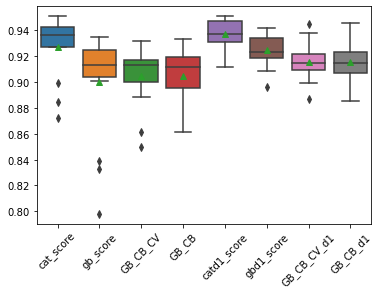

In [42]:
sns.boxplot(data=combo_d1, showmeans=True).tick_params(axis='x', labelrotation=45);

In [43]:
combo_d1.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.904720,0.904457,0.936878,0.924317,0.915572,0.915435
std,0.023191,0.041473,0.022774,0.021228,0.011131,0.012277,0.014356,0.014064
min,0.872051,0.798137,0.849919,0.861333,0.911824,0.895961,0.886517,0.885200
25%,0.926860,0.903875,0.899728,0.895213,0.930445,0.918784,0.909475,0.907082
50%,0.936517,0.913265,0.912922,0.911611,0.936986,0.923176,0.914928,0.914469
75%,0.942064,0.924419,0.917159,0.919564,0.946589,0.933732,0.921432,0.923307
max,0.950638,0.934496,0.931763,0.932942,0.950737,0.941296,0.944573,0.945082


In [44]:
ordinald2 = pd.read_csv('OrdinalDrop2.csv')
ordinald2.shape

(2578, 83)

In [45]:
ordinald2 = ordinald2.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald2.shape

(2578, 80)

In [46]:
X2 = ordinald2.drop(['SalePrice'], axis=1)
y2 = ordinald2.SalePrice

In [47]:
catd2 = evaluate_model(cb, X2, y2)

In [48]:
catd2 = catd2[['test_score']].rename(columns={'test_score':'catd2_score'})

In [49]:
catd2

,catd2_score
0,0.931945
1,0.938533
2,0.947346
3,0.918753
4,0.944991
5,0.934845
6,0.941550
7,0.933222
8,0.945822
9,0.942002


In [50]:
gd2 = evaluate_model(gb, X2, y2)

In [51]:
gd2 = gd2[['test_score']].rename(columns={'test_score':'gbd2_score'})

In [52]:
gd2

,gbd2_score
0,0.914243
1,0.923267
2,0.930881
3,0.897713
4,0.939440
5,0.912199
6,0.932387
7,0.922119
8,0.943442
9,0.916864


In [53]:
GB_CB_CV_d2 = evaluate_model(gb_cb_cv, X2, y2)

In [54]:
GB_CB_CV_d2 = GB_CB_CV_d2[['test_score']].rename(columns={'test_score':'GB_CB_CV_d2'})

In [55]:
GB_CB_CV_d2

,GB_CB_CV_d2
0,0.912197
1,0.932629
2,0.918555
3,0.889675
4,0.930996
5,0.908143
6,0.923874
7,0.919997
8,0.943433
9,0.904995


In [ ]:
GB_CB_d2 = evaluate_model(gb_cb, X2, y2)

In [ ]:
GB_CB_d2 = GB_CB_d2[['test_score']].rename(columns={'test_score':'GB_CB_d2'})

In [ ]:
GB_CB_d2

In [ ]:
combo_d2 = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2], axis=1)

In [ ]:
combo_d2

In [ ]:
sns.boxplot(data=combo_d2, showmeans=True).tick_params(axis='x', labelrotation=45);

In [ ]:
combo_d2.describe()

In [63]:
ordinalIF = pd.read_csv('OrdinalDropIF.csv')
ordinalIF.shape

(2579, 83)

In [64]:
ordinalIF = ordinalIF.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF.shape

(2579, 80)

In [65]:
XIF = ordinalIF.drop(['SalePrice'], axis=1)
yIF = ordinalIF.SalePrice

In [66]:
catIF = evaluate_model(cb, XIF, yIF)

In [67]:
catIF = catIF[['test_score']].rename(columns={'test_score':'catIF_score'})

In [68]:
catIF

,catIF_score
0,0.935051
1,0.940925
2,0.904279
3,0.914509
4,0.948420
5,0.929249
6,0.936556
7,0.927905
8,0.897123
9,0.949209


In [69]:
gIF = evaluate_model(gb, XIF, yIF)

In [70]:
gIF = gIF[['test_score']].rename(columns={'test_score':'gIF_score'})

In [71]:
gIF

,gIF_score
0,0.920524
1,0.933841
2,0.868476
3,0.890834
4,0.925737
5,0.915637
6,0.924019
7,0.915101
8,0.857383
9,0.930269


In [72]:
GB_CB_CV_IF = evaluate_model(gb_cb_cv, XIF, yIF)

In [73]:
GB_CB_CV_IF = GB_CB_CV_IF[['test_score']].rename(columns={'test_score':'GB_CB_CV_IF_score'})

In [74]:
GB_CB_CV_IF

,GB_CB_CV_IF_score
0,0.935487
1,0.937959
2,0.900079
3,0.908059
4,0.943991
5,0.927102
6,0.935831
7,0.919291
8,0.896937
9,0.943061


In [75]:
GB_CB_IF = evaluate_model(gb_cb, XIF, yIF)

In [76]:
GB_CB_IF = GB_CB_IF[['test_score']].rename(columns={'test_score':'GB_CB_IF_score'})

In [77]:
GB_CB_IF

,GB_CB_IF_score
0,0.936110
1,0.938918
2,0.897480
3,0.906658
4,0.946295
5,0.922507
6,0.937190
7,0.915083
8,0.899309
9,0.937057


In [78]:
combo_IF = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2,
                      catIF, gIF, GB_CB_CV_IF, GB_CB_IF], axis=1)

In [80]:
combo_IF

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score
0,0.926950,0.916466,0.924488,0.920859,0.931308,0.908753,0.926286,0.923769,0.931945,0.914243,0.928059,0.931787,0.935051,0.920524,0.935487,0.936110
1,0.898789,0.832746,0.896521,0.903301,0.946897,0.939744,0.947589,0.948160,0.938533,0.923267,0.940267,0.937868,0.940925,0.933841,0.937959,0.938918
2,0.936517,0.913140,0.929380,0.931813,0.946280,0.936716,0.945496,0.943670,0.947346,0.930881,0.940669,0.946176,0.904279,0.868476,0.900079,0.897480
3,0.929022,0.900737,0.920098,0.924353,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209,0.914509,0.890834,0.908059,0.906658
4,0.950638,0.931130,0.948507,0.948466,0.949900,0.937107,0.950007,0.949078,0.944991,0.939440,0.945595,0.947324,0.948420,0.925737,0.943991,0.946295
5,0.936688,0.911643,0.927679,0.928996,0.933133,0.915868,0.929574,0.928476,0.934845,0.912199,0.925667,0.927594,0.929249,0.915637,0.927102,0.922507
6,0.942846,0.924417,0.936054,0.939781,0.929582,0.923176,0.933765,0.933644,0.941550,0.932387,0.940447,0.942651,0.936556,0.924019,0.935831,0.937190
7,0.926769,0.907012,0.922235,0.925835,0.926053,0.919474,0.925759,0.925781,0.933222,0.922119,0.931273,0.935038,0.927905,0.915101,0.919291,0.915083
8,0.945508,0.926922,0.941486,0.941722,0.950737,0.941296,0.950280,0.950220,0.945822,0.943442,0.941838,0.942140,0.897123,0.857383,0.896937,0.899309
9,0.884738,0.838528,0.878844,0.886379,0.939564,0.921069,0.931964,0.934893,0.942002,0.916864,0.937244,0.939463,0.949209,0.930269,0.943061,0.937057


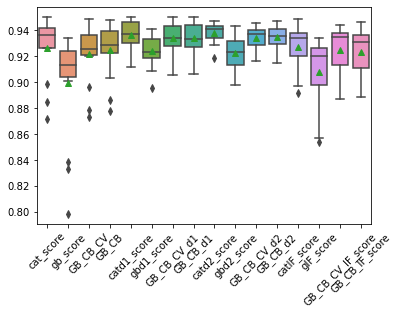

In [81]:
sns.boxplot(data=combo_IF, showmeans=True).tick_params(axis='x', labelrotation=45);

In [82]:
combo_IF.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.922110,0.925184,0.936878,0.924317,0.934417,0.933957,0.938227,0.922535,0.934212,0.934618,0.927303,0.907919,0.924718,0.923032
std,0.023191,0.041473,0.022444,0.020922,0.011131,0.012277,0.012178,0.012242,0.007841,0.013025,0.008465,0.009223,0.017662,0.027205,0.018368,0.017757
min,0.872051,0.798137,0.873527,0.877874,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209,0.892030,0.853744,0.887012,0.888940
25%,0.926860,0.903875,0.921167,0.922606,0.930445,0.918784,0.927930,0.927128,0.934034,0.913221,0.928448,0.929690,0.919950,0.897821,0.913675,0.910871
50%,0.936517,0.913265,0.925885,0.928996,0.936986,0.923176,0.933977,0.933644,0.941039,0.923267,0.937244,0.936096,0.934177,0.920524,0.935340,0.931273
75%,0.942064,0.924419,0.936741,0.939864,0.946589,0.933732,0.943374,0.944266,0.943497,0.931634,0.940558,0.940802,0.937682,0.926203,0.937912,0.936584
max,0.950638,0.934496,0.948507,0.948466,0.950737,0.941296,0.950280,0.950220,0.947346,0.943442,0.945595,0.947324,0.949209,0.933841,0.943991,0.946295
